### Model Predicting Fire & Non Fire Using White Hot Images  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [4]:
import os

path = os.listdir('./Datasets/Processed_Thermal_Images/Fir/')
classes = {'No_Fire':0, 'Fire':1}

In [14]:
import cv2
X = []
Y = []
for cls in classes:
    pth = './Datasets/Processed_Thermal_Images/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j)
        img = cv2.resize(img, (224,224))
        X.append(img)
        Y.append(classes[cls])

In [15]:
np.unique(Y)

array([0, 1])

In [16]:
X = np.array(X)
Y = np.array(Y)

In [17]:
pd.Series(Y).value_counts()

1    2015
0    2003
dtype: int64

In [18]:
X.shape,Y.shape

((4018, 224, 224, 3), (4018,))

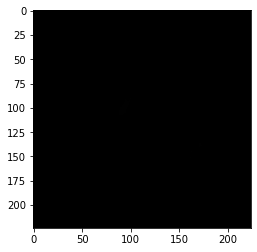

In [20]:
plt.imshow(X[15], cmap='gray')

In [21]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(4018, 150528)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, test_size=0.3, random_state=42)

In [23]:
X_train.shape, X_test.shape

((2812, 150528), (1206, 150528))

In [24]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
# #Applying PCA
# from sklearn.decomposition import PCA
# pca = PCA(.98)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [26]:
X_train.shape,X_test.shape

((2812, 150528), (1206, 150528))

## Training Different Models  

In [17]:
#Training the logistic regression model
from sklearn.linear_model import LogisticRegression
Lr_classifier = LogisticRegression(random_state=0)
Lr_classifier.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
#Training the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB , BernoulliNB ,MultinomialNB # GaussianNB : For Continuous distribution of data , BernoulliNB: For the dataset having only two classes i.e 0 & 1 , MultinomialNB: For the dataset having count or we can say how many times word repeated ..mostly used for NLP .

NB = BernoulliNB()

NB.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [19]:
# # Training the K - Nearest Neighbour Model
# from sklearn.neighbors import KNeighborsClassifier

# # Choosing correct value of K 
# error_rate = []

# # Will take some time
# for i in range(1,40):
    
#     knn = KNeighborsClassifier(n_neighbors=i)
    
#     knn.fit(X_train,y_train)
    
#     pred_i = knn.predict(X_test)
    
#     error_rate.append(np.mean(pred_i != y_test))

In [20]:
# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')

In [21]:
# # NOW WITH K=15
# from sklearn.metrics import classification_report,confusion_matrix
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=15)

# knn.fit(X_train,y_train)

In [27]:
# Training the Random Forest  Model
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20,random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [28]:
# Training the SVM Model
from sklearn.svm import SVC
Svc_classifier = SVC()
Svc_classifier.fit(X_train,y_train)

SVC()

## Evaluation of Models

In [24]:
print("Training Score:", Lr_classifier.score(X_train, y_train))
print("Testing Score:", Lr_classifier.score(X_test, y_test))

Training Score: 1.0
Testing Score: 0.9452054794520548


In [25]:
# print("Training Score:", knn.score(X_train, y_train))
# print("Testing Score:", knn.score(X_test, y_test))

In [26]:
print("Training Score:", NB.score(X_train, y_train))
print("Testing Score:",  NB.score(X_test, y_test))

Training Score: 0.5173703901656868
Testing Score: 0.5031133250311333


In [29]:
print("Training Score:", clf.score(X_train, y_train))
print("Testing Score:", clf.score(X_test, y_test))

Training Score: 1.0
Testing Score: 0.9842454394693201


In [30]:
print("Training Score:", Svc_classifier.score(X_train, y_train))
print("Testing Score:", Svc_classifier.score(X_test, y_test))

Training Score: 0.9975106685633002
Testing Score: 1.0


## Prediction

In [48]:
Svm_pred = Svc_classifier.predict(X_test)

In [30]:
Lr_pred = Lr_classifier.predict(X_test)

In [32]:
clf_pred = clf.predict(X_test)

In [49]:
misclassified=np.where(y_test!=Svm_pred)
misclassified

(array([], dtype=int64),)

In [46]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(clf_pred[36],y_test[36])

Total Misclassified Samples:  19
1 1


# Test Model

In [38]:
dec = {0:'No_Fire', 1:'Fire'}

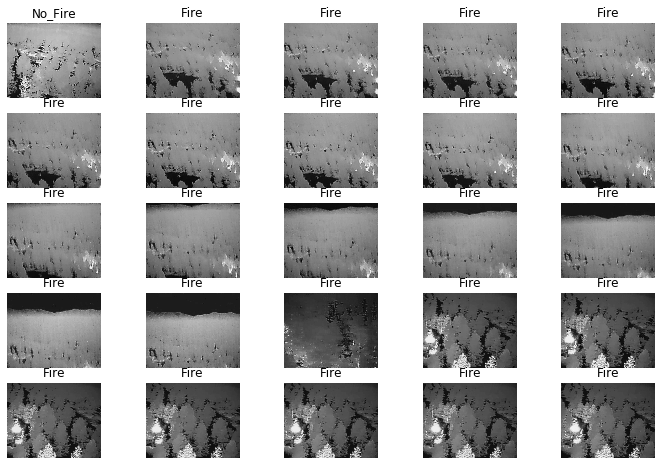

In [45]:
plt.figure(figsize=(12,8))
p = os.listdir('Datasets/Machine Learning (Data)/Testing set/')
c=1
for i in os.listdir('Datasets/Machine Learning (Data)/Testing Set/Test Image/')[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread('Datasets/Machine Learning (Data)/Testing set/Test Image/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = clf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

(-0.5, 3839.5, 2159.5, -0.5)

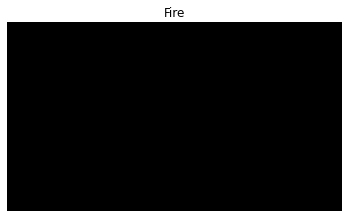

In [44]:
import cv2
import numpy as np
img = cv2.imread("./Datasets/image_27.png")
blur = cv2.GaussianBlur(img, (15, 15), 0)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
lower = [20, 100, 100]
upper = [30, 255, 255]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")
mask = cv2.inRange(hsv, lower, upper)
output = cv2.bitwise_and(img, hsv, mask=mask)
img1 = cv2.resize(output, (224,224))
img1 = img1.reshape(1,-1)/255
p = clf.predict(img1)
plt.title(dec[p[0]])
plt.imshow(output)
plt.axis('off')